ben485.png----------


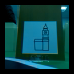

size : 960
size : 900


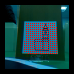

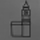

ben499.png----------


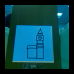

size : 1224
size : 1156


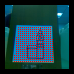

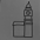

ben471.png----------


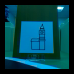

size : 840
size : 840


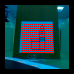

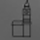

chicago132.png----------


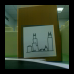

size : 1596
size : 676


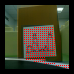

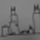

ben476.png----------


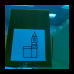

size : 896
size : 784


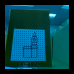

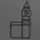

kal421.png----------


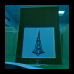

size : 840
size : 728


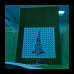

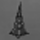

chicago60.png----------


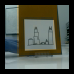

size : 784
size : 728


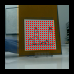

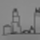

ben477.png----------


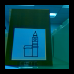

size : 840
size : 784


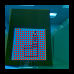

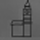

chicago142.png----------


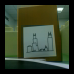

size : 1596
size : 676


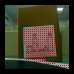

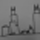

ben237.png----------


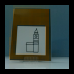

size : 676
size : 676


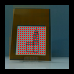

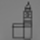

ben115.png----------


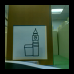

size : 2268
size : 2160
too big, there may be a problem
ben468.png----------


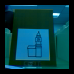

size : 840
size : 784


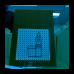

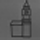

chicago181.png----------


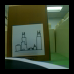

size : 780
size : 728


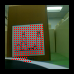

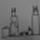

chicago90.png----------


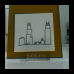

size : 1368
size : 1224


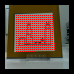

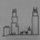

ben19.png----------


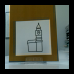

size : 960
size : 960


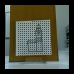

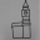

ben42.png----------


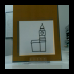

size : 1088
size : 960


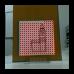

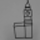

chicago162.png----------


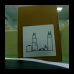

size : 1728
size : 1472


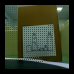

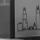

ben450.png----------


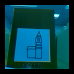

size : 960
size : 900


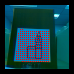

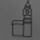

ben43.png----------


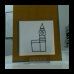

size : 1156
size : 960


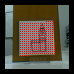

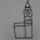

ben367.png----------


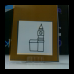

size : 1020
size : 900


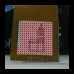

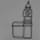

chicago98.png----------


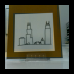

size : 1368
size : 1224


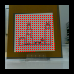

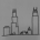

chicago179.png----------


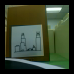

size : 2480
size : 1120


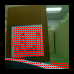

a


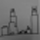

ben475.png----------


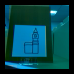

size : 840
size : 784


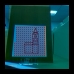

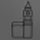

chicago197.png----------


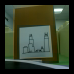

size : 1900
size : 1008


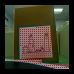

a


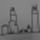

chicago131.png----------


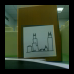

size : 1596
size : 676


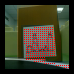

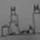

ben497.png----------


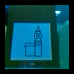

size : 1292
size : 1224


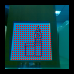

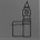

chicago203.png----------


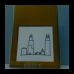

size : 1088
size : 960


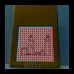

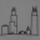

ben289.png----------


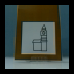

size : 960
size : 900


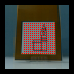

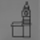

ben495.png----------


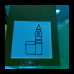

size : 1224
size : 1224


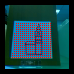

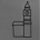

ben364.png----------


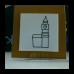

size : 1368
size : 1224


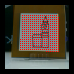

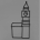

chicago227.png----------


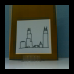

size : 1024
size : 1024


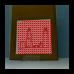

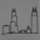

chicago139.png----------


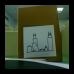

size : 1596
size : 676


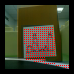

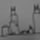

ben459.png----------


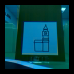

size : 960
size : 900


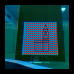

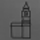

kal406.png----------


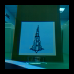

size : 1020
size : 900


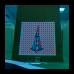

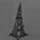

chicago241.png----------


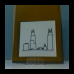

size : 1224
size : 1024


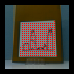

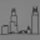

ben488.png----------


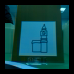

size : 1152
size : 1024


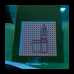

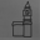

ben466.png----------


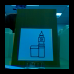

size : 896
size : 784


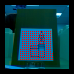

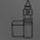

ben360.png----------


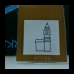

size : 1088
size : 1024


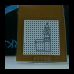

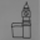

ben461.png----------


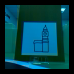

size : 960
size : 784


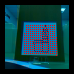

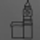

ben14.png----------


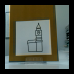

size : 1024
size : 960


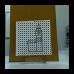

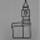

ben483.png----------


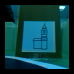

size : 840
size : 784


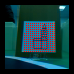

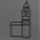

chicago111.png----------


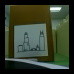

size : 1920
size : 784


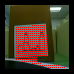

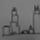

ben479.png----------


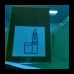

size : 780
size : 728


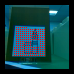

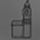

ben486.png----------


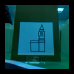

size : 960
size : 840


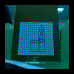

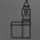

chicago182.png----------


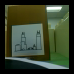

size : 2160
size : 1064


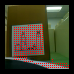

a


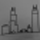

chicago108.png----------


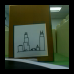

size : 1920
size : 784


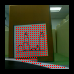

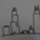

ben470.png----------


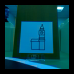

size : 840
size : 784


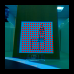

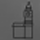

ben491.png----------


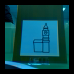

size : 1224
size : 1024


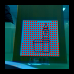

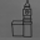

ben348.png----------


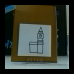

size : 840
size : 840


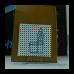

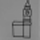

ben48.png----------


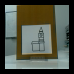

size : 676
size : 676


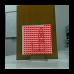

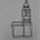

ben240.png----------


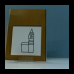

size : 988
size : 624


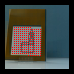

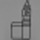

kal52.png----------


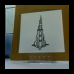

size : 1672
size : 1520


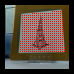

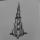

chicago41.png----------


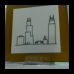

size : 2112
size : 1848


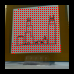

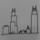

ben41.png----------


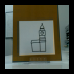

size : 1088
size : 960


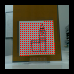

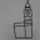

chicago164.png----------


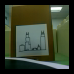

size : 832
size : 728


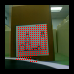

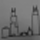

chicago127.png----------


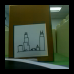

size : 1920
size : 784


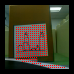

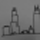

kal318.png----------


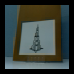

size : 960
size : 900


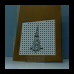

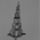

chicago165.png----------


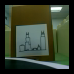

size : 1360
size : 1008


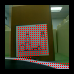

a


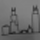

ben500.png----------


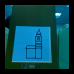

size : 1152
size : 1088


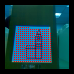

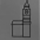

chicago224.png----------


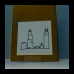

size : 960
size : 900


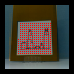

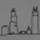

chicago84.png----------


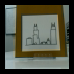

size : 1088
size : 1088


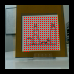

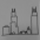

ben496.png----------


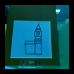

size : 1292
size : 1224


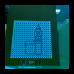

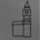

ben135.png----------


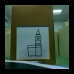

size : 3348
size : 1984


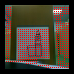

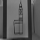

ben56.png----------


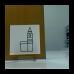

size : 728
size : 728


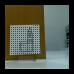

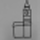

ben354.png----------


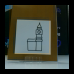

size : 1088
size : 1024


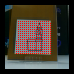

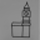

ben469.png----------


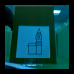

size : 900
size : 840


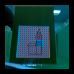

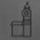

chicago235.png----------


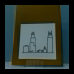

size : 1156
size : 1024


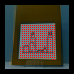

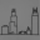

ben498.png----------


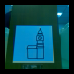

size : 1224
size : 1224


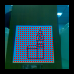

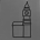

chicago246.png----------


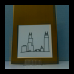

size : 1024
size : 900


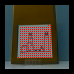

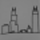

ben453.png----------


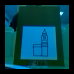

size : 1020
size : 840


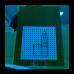

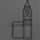

ben460.png----------


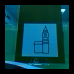

size : 960
size : 840


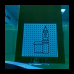

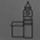

chicago144.png----------


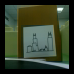

size : 1596
size : 676


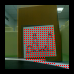

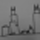

chicago152.png----------


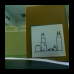

size : 2668
size : 1904


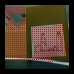

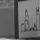

kal380.png----------


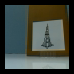

size : 780
size : 728


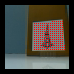

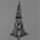

chicago248.png----------


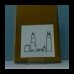

size : 960
size : 840


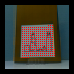

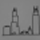

ben472.png----------


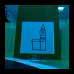

size : 900
size : 784


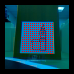

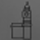

kal322.png----------


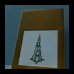

size : 1156
size : 1024


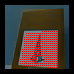

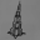

chicago199.png----------


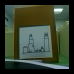

size : 1900
size : 1008


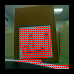

a


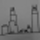

ben39.png----------


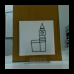

size : 1088
size : 960


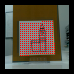

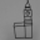

ben20.png----------


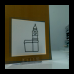

size : 1024
size : 900


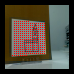

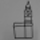

ben481.png----------


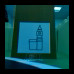

size : 728
size : 676


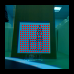

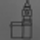

ben2.png----------


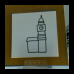

size : 2024
size : 1764


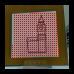

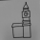

chicago238.png----------


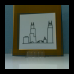

size : 1224
size : 1088


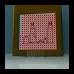

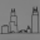

ben287.png----------


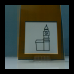

size : 900
size : 900


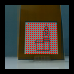

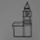

chicago256.png----------


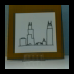

size : 1520
size : 1368


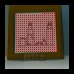

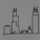

chicago150.png----------


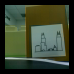

size : 2668
size : 1904


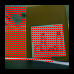

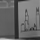

ben455.png----------


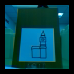

size : 960
size : 784


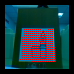

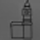

chicago254.png----------


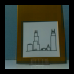

size : 1088
size : 1024


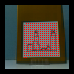

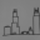

ben484.png----------


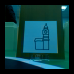

size : 896
size : 840


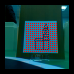

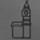

ben487.png----------


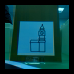

In [ ]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
from IPython import display 
import numpy as np
import PIL.Image 
import time
import cv2
import os


##
path = "/home/pi/zumi/sample/deep-learning-demos/arrow/test/"

img_result_size = 40
max_img_cropped_size = 2100
thresh_hold_DOWN = 80
thresh_hold_UP = 255
##

window_4 = np.ones((4,4), np.uint8)
window_3 = np.ones((3,3), np.uint8)

X = 40
Y = 37
idx = 0
center_X = [X, X, X-3, X-3, X+3, X+3, X+3, X, X-3, X-6, X-6, X-6, X+6, X+6, X+6]
center_Y = [Y, Y-3, Y, Y-3, Y, Y-3, Y+3, Y+3, Y+3, Y, Y-3, Y+3, Y, Y-3, Y+3]

UP = 0
DOWN = 0
LEFT = 0
RIGHT = 0
max_up = 0
max_down = 0
max_left = 0
max_right = 0
up=[0]*74
down=[0]*74
left=[0]*74
right=[0]*74


img_closed = 0
image = 0
visit = [[0 for col in range(74)] for row in range(74)]

def labeling (y, x):
    global UP, DOWN, LEFT, RIGHT, max_up, max_down, max_left, max_right
    if y < UP :
        up[y] += 1
        max_up = y
        if up[y] > 12 :
            UP = y
    if y > DOWN :
        down[y] += 1
        max_down = y
        if down[y] > 12 :
            DOWN = y
    if x < LEFT :
        left[x] += 1
        max_left = x
        if left[x] > 12 :
            LEFT = x
    if x > RIGHT :
        right[x] += 1
        max_right = x
        if right[x] > 12 :
            RIGHT = x

    visit[y][x] = 1    
    image[y,x] = np.array([255,0,0]) #RED
                
    dir = [-2,0,2]
    for j in range(3):
        for i in range(3):
            if img_closed[y+dir[j],x+dir[i]] != 0 and not visit[y+dir[j]][x+dir[i]]:
                labeling(y+dir[j],x+dir[i])
                

                
for file in os.listdir(path):
    if file[-3:] =='png' : 
    #if file =='chicago197.png' or file =='chicago131.png':
    
        print(file+"----------")
        
        image = cv2.imread(path+ file,1)
        image = cv2.copyMakeBorder(image, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0,0,0])

        display.display(PIL.Image.fromarray(image))

        img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        img_binary = cv2.threshold(img_gray, thresh_hold_DOWN, thresh_hold_UP, cv2.THRESH_BINARY)[1]
        #print("binary image")
        #display.display(PIL.Image.fromarray(img_binary))

        dilation_image = cv2.dilate(img_binary, window_4, iterations=1)  #// make dilation image
        img_closed = cv2.erode(dilation_image, window_3, iterations=2)  
        
        for i in range(len(center_X)):
            if img_closed[center_Y[i]-1:center_Y[i]+1,center_X[i]-1:center_X[i]+1].all() :
                #print(i)
                idx = i
                UP = center_Y[idx]
                DOWN = center_Y[idx]
                LEFT = center_X[idx]
                RIGHT = center_X[idx]
                break

        if idx == len(center_X) -1 :
            print('fail')
        else :
            #print('closed image')
            #display.display(PIL.Image.fromarray(img_closed))

            labeling(center_Y[idx],center_X[idx])
            size = (max_down - max_up) * (max_right -max_left)
            print("size : " + str(size))
            
            size = (DOWN - UP) * (RIGHT -LEFT)
            print("size : " + str(size))
            
            if size > max_img_cropped_size :
                print("too big, there may be a problem")
            else:
                display.display(PIL.Image.fromarray(image))

                if DOWN-UP > RIGHT-LEFT + 2 :
                    print("a")
                    img_cropped = img_gray[UP:UP + (RIGHT-LEFT),LEFT:RIGHT]
                else :
                    img_cropped = img_gray[UP:DOWN,LEFT:RIGHT]
                
                img_result = cv2.resize(img_cropped, (img_result_size,img_result_size), interpolation=cv2.INTER_CUBIC)
                #print('cropped and rezised by ' + str(img_result_size) + ' pixels.')
                display.display(PIL.Image.fromarray(img_result))
                
                # may use the size value later...
                file_name = "/home/pi/zumi/sample/deep-learning-demos/arrow/result/" + file[:-4] + ".cropped."+ str(size) +".png"
                cv2.imwrite(file_name, img_result)

        visit = [[0 for col in range(74)] for row in range(74)]
        up=[0]*74
        down=[0]*74
        left=[0]*74
        right=[0]*74
            